# 1 Carga de Datos

In [45]:
import pandas as pd  # para manipulación de dataframes y tablas
from datetime import datetime, date, timedelta  # para trabajar con fechas y tiempos
import os  # para manejar rutas del sistema y operaciones relacionadas
from zipfile import ZipFile # para trabajar con archivos zip
import shutil  # para copiar y mover archivos y directorios
from pathlib import Path  # para trabajar de manera más cómoda con rutas en el sistema
import numpy as np  # para trabajar con arreglos y matrices numéricas

In [46]:
R_Ms_SIE = r"C:\Users\osmarrincon\OneDrive - uniminuto.edu\Capresoca\AlmostClear\SIE\Aseguramiento\ms_sie\Reporte_Validación Archivos Maestro_2025_06_11.csv"
R_Ms_ADRES_EPS025 = r"C:\Users\osmarrincon\OneDrive - uniminuto.edu\Capresoca\AlmostClear\Procesos BDUA\Subsidiados\Maestro\MS\2025-2\EPS025MS0009062025.TXT"
R_Ms_ADRES_EPSC25 = r"C:\Users\osmarrincon\OneDrive - uniminuto.edu\Capresoca\AlmostClear\Procesos BDUA\Contributivo\Maestro\2025-2\EPSC25MC0009062025.TXT"
R_Expedientes_SIE = r"C:\Users\osmarrincon\OneDrive - uniminuto.edu\Capresoca\AlmostClear\SIE\Aseguramiento\Expedientes"
R_Historico_Identificacion_EPS025 = r"C:\Users\osmarrincon\OneDrive - uniminuto.edu\Capresoca\AlmostClear\Procesos BDUA\Subsidiados\Historico\2025\20250601-HISTORICOS\HISTORICO_IDENTIFICACION_S_E.TXT.ZIP"
R_Historico_Identificacion_EPSC25 = r"C:\Users\osmarrincon\OneDrive - uniminuto.edu\Capresoca\AlmostClear\Procesos BDUA\Contributivo\Historico\2025\20250601-HISTORICOS\HISTORIA_IDENTIFICACION.TXT.ZIP"
R_Historico_Grupo_Familia_EPSC25 = r"C:\Users\osmarrincon\OneDrive - uniminuto.edu\Capresoca\AlmostClear\Procesos BDUA\Contributivo\Historico\2025\20250601-HISTORICOS\HISTORIA_GRUPO_FAMILIAR.TXT.ZIP"
R_Historico_Grupo_Familia_EPS025 = r"C:\Users\osmarrincon\OneDrive - uniminuto.edu\Capresoca\AlmostClear\Procesos BDUA\Subsidiados\Historico\2025\20250601-HISTORICOS\HISTORIA_GRUPO_FAMILIAR_E.TXT.ZIP"
R_Municipios_DANE = r"C:\Users\osmarrincon\OneDrive - uniminuto.edu\Capresoca\AlmostClear\Constantes\Departamentos.txt"
R_Municipios_SIE = r"C:\Users\osmarrincon\OneDrive - uniminuto.edu\Capresoca\AlmostClear\SIE\codificación de variables categóricas\Reporte_MUNICIPIOS_2025_05_14.csv"
R_Parentesco_SIE = r"C:\Users\osmarrincon\OneDrive - uniminuto.edu\Capresoca\AlmostClear\SIE\codificación de variables categóricas\Parentescos Codificados.txt"
R_Estado_SIE = r"C:\Users\osmarrincon\OneDrive - uniminuto.edu\Capresoca\AlmostClear\SIE\codificación de variables categóricas\ESTADO DE AFILIACION.txt"
R_Regimen_SIE = r"C:\Users\osmarrincon\OneDrive - uniminuto.edu\Capresoca\AlmostClear\SIE\codificación de variables categóricas\regimen codificado.txt"
R_Tipo_Afiliados_SIE = r"C:\Users\osmarrincon\OneDrive - uniminuto.edu\Capresoca\AlmostClear\SIE\codificación de variables categóricas\Tipo de afiliado.txt"

R_Salida = r"\\Servernas\AYC2\ASEGURAMIENTO\ASEGURAMIENTO\PROCESO_ASEGURAMIENTO\REGIMEN SUBSIDIADO\MUNICIPIOS 2025\ACTUALIZACION SIE\01_Procesos BDUA validación SIE\06_Junio\Yesid"

In [47]:
Df_Parentesco_SIE = pd.read_csv(R_Parentesco_SIE, sep=';', dtype=str, encoding='ANSI')
Df_Estado_SIE = pd.read_csv(R_Estado_SIE, sep=';', dtype=str, encoding='ANSI')
Df_Regimen_SIE = pd.read_csv(R_Regimen_SIE, sep=';', dtype=str, encoding='ANSI')
Df_Tipo_Afiliados_SIE = pd.read_csv(R_Tipo_Afiliados_SIE, sep=';', dtype=str, encoding='ANSI')
df_Municipios_SIE = pd.read_csv(R_Municipios_SIE, sep=';', dtype=str, encoding='ANSI')

In [48]:
# Asegurarse de que df_Municipios_SIE["municipio"] tenga 5 dígitos
df_Municipios_SIE["municipio"] = df_Municipios_SIE["municipio"].astype(str).str.zfill(5)

In [49]:
# Listar todos los archivos .TXT en la carpeta R_Expedientes_SIE
txt_files = list(Path(R_Expedientes_SIE).glob("*.TXT"))

# Cargar cada archivo en un dataframe y luego concatenarlos
df_list = [pd.read_csv(file, sep="|", encoding="ANSI", dtype=str) for file in txt_files]
DF_Expedientes_SIE = pd.concat(df_list, ignore_index=True)

print("Número total de registros:", DF_Expedientes_SIE.shape[0])

Número total de registros: 315121


In [50]:
new_columns = [
    "AFL_ID", "TPS_IDN_ID", "HST_IDN_NUMERO_IDENTIFICACION",
    "HST_IDN_FECHA_INICIO", "HST_IDN_FECHA_FIN", "ENT_ID"
]

def load_txt_from_zip(zip_path: str,
                      txt_name: str,
                      columns: list[str],
                      sep: str = ",",
                      encoding: str = "ANSI") -> pd.DataFrame:
    """
    Abre zip_path, extrae txt_name y lo carga en un DataFrame con las columnas dadas.
    """
    with ZipFile(zip_path) as z:
        with z.open(txt_name) as f:
            df = pd.read_csv(
                f,
                sep=sep,
                header=None,
                dtype=str,
                encoding=encoding
            )
    df.columns = columns
    return df

# ahora, para cada archivo ZIP basta con:
Df_H_I_EPS025 = load_txt_from_zip(
    R_Historico_Identificacion_EPS025,
    "HISTORICO_IDENTIFICACION_S_E.TXT",
    new_columns
)

Df_H_I_EPSC25 = load_txt_from_zip(
    R_Historico_Identificacion_EPSC25,
    "HISTORIA_IDENTIFICACION.TXT",
    new_columns
)

In [51]:
new_columns = [
    "GRP_FML_COTIZANTE_ID", "GRP_FML_AFILIADO_ID", "TPS_PRN_ID",
    "GRP_FML_FECHA_INICIO", "GRP_FML_FECHA_FIN", "ENT_ID"
]

def load_txt_from_zip(zip_path: str,
                      txt_name: str,
                      columns: list[str],
                      sep: str = ",",
                      encoding: str = "UTF-8") -> pd.DataFrame:
    """
    Abre zip_path, extrae txt_name y lo carga en un DataFrame con las columnas dadas.
    """
    with ZipFile(zip_path) as z:
        with z.open(txt_name) as f:
            df = pd.read_csv(
                f,
                sep=sep,
                header=None,
                dtype=str,
                encoding=encoding
            )
    df.columns = columns
    return df

# ahora, para cada archivo ZIP basta con:
Df_H_GF_EPSC25 = load_txt_from_zip(
    R_Historico_Grupo_Familia_EPS025,
    "HISTORIA_GRUPO_FAMILIAR_E.TXT",
    new_columns
)

Df_H_GF_EPS025 = load_txt_from_zip(
    R_Historico_Grupo_Familia_EPSC25,
    "HISTORIA_GRUPO_FAMILIAR.TXT",
    new_columns
)

In [52]:
Df_SIE = pd.read_csv(R_Ms_SIE, sep=';', dtype=str, encoding='ANSI')
Df_Cod_DANE = pd.read_csv(R_Municipios_DANE, sep=';', dtype=str, encoding='utf-8')

new_columns = ["AFL_ID", "ENT_ID", "TPS_IDN_ID_CF", "HST_IDN_NUMERO_IDENTIFICACION_CF", "TPS_IDN_ID", "HST_IDN_NUMERO_IDENTIFICACION", "AFL_PRIMER_APELLIDO", "AFL_SEGUNDO_APELLIDO", "AFL_PRIMER_NOMBRE", "AFL_SEGUNDO_NOMBRE", "AFL_FECHA_NACIMIENTO", "TPS_GNR_ID", "AFL_PAIS_NACIMIENTO", "AFL_MUNICIPIO_NACIMIENTO", "AFL_NACIONALIDAD", "AFL_SEXO_IDENTIFICACION", "AFL_DISCAPACIDAD", "TPS_AFL_ID", "TPS_PRN_ID", "TPS_GRP_PBL_ID", "TPS_NVL_SSB_ID", "NUMEROFICHASISBEN", "TPS_CND_BNF_ID", "DPR_ID", "MNC_ID", "ZNS_ID", "AFL_FECHA_AFILIACION_SGSSS", "AFC_FECHA_INICIO", "NUMERO CONTRATO", "FECHADE INICIO DEL CONTRATO", "CNT_AFL_TPS_GRP_PBL_ID", "CNT_AFL_TPS_PRT_ETN_ID", "TPS_MDL_SBS_ID", "TPS_EST_AFL_ID", "CND_AFL_FECHA_INICIO", "CND_AFL_FECHA_INICIO", "GRP_FML_COTIZANTE_ID", "PORTABILIDAD", "COD_IPS_P", "MTDLG_G_P", "SUB_SISBEN_IV", "MARCASISBENIV+MARCASISBENIII", "CRUCE_BDEX_RNEC"]

Df_EPS025 = pd.read_csv(R_Ms_ADRES_EPS025, sep=',', header=None, dtype=str, encoding='ANSI')
Df_EPS025.columns = new_columns

Df_EPSC25 = pd.read_csv(R_Ms_ADRES_EPSC25, sep=',', header=None, dtype=str, encoding='ANSI')
Df_EPSC25.columns = new_columns

## 1.1 Limpiar Bases de datos

### 1.1.1 Expedientes SIE

In [53]:
print(DF_Expedientes_SIE.columns)

Index(['Proceso', 'Tipo', 'Expediente', 'Tipo Documento',
       'Número Identificación', 'Nombre Afiliado', 'Fecha de Nacimiento',
       'Departamento', 'Municipio', 'Estado Expediente', 'Régimen Expediente',
       'Fecha Grabado', 'Usuario Grabado', 'Fecha Cierre', 'Usuario Cierre',
       'Carta Derechos', 'NS Automática', 'Tipo Ingreso', 'EPS Procedencia',
       'Causal Anulación', 'Motivo Anulación', 'Usuario Anula', 'Fecha Anula',
       'Unnamed: 23'],
      dtype='object')


In [54]:
print("Número total de registros:", DF_Expedientes_SIE.shape[0])
print( DF_Expedientes_SIE['Proceso'].value_counts() )

Número total de registros: 315121
Proceso
Ingreso Afiliado Contributivo Cotizante               101658
Movilidad RS                                           56522
Afiliación por Adición Relación Laboral                41249
Fin Relación Laboral                                   27930
Afiliación Régimen Subsidiado Cabeza de Familia        18388
Ingreso Aportantes                                     13674
Actualización RS Definición Poblacional                11532
Actualización Municipio                                 8458
Afiliación Régimen Subsidiado Beneficiario              6354
Actualización Identificación                            4756
Afiliación Régimen Subsidiado Nacimiento                4516
Retiro de la Entidad                                    2877
Actualización Apellidos                                 2014
N36 Beneficiario a Cabeza de familia                    1966
N31: Reactivación RS                                    1806
N32: Grupo Familiar RS                     

In [55]:
print("Número de registros antes de limpiar expedientes:", DF_Expedientes_SIE.shape[0])
DF_Expedientes_SIE = DF_Expedientes_SIE[DF_Expedientes_SIE['Estado Expediente'] == 'Cerrado']
print("Número de registros con 'Cerrado':", DF_Expedientes_SIE.shape[0])

Número de registros antes de limpiar expedientes: 315121
Número de registros con 'Cerrado': 307718


In [56]:
print("Número total de registros:", DF_Expedientes_SIE.shape[0])
# 1) Convierte a datetime
DF_Expedientes_SIE['Fecha Grabado'] = pd.to_datetime(
    DF_Expedientes_SIE['Fecha Grabado'],
    format='%Y/%m/%d %H:%M',  # ajusta si tu formato es distinto
    errors='coerce'
)
DF_Expedientes_SIE['Fecha Cierre'] = pd.to_datetime(
    DF_Expedientes_SIE['Fecha Cierre'],
    format='%Y/%m/%d %H:%M',  # ajusta si tu formato es distinto
    errors='coerce'
)
# 2) Ordena de más antiguo a más reciente
DF_Expedientes_SIE = DF_Expedientes_SIE.sort_values('Fecha Grabado')

# 3) Elimina duplicados, quedándote con el último (el más reciente)
DF_Expedientes_SIE = DF_Expedientes_SIE.drop_duplicates(
    subset=['Proceso', 'Tipo Documento', 'Número Identificación'],
    keep='last'
)
# 4) Re-formatea la fecha a DD/MM/YYYY
DF_Expedientes_SIE['Fecha Grabado'] = DF_Expedientes_SIE['Fecha Grabado'].dt.strftime('%d/%m/%Y')
DF_Expedientes_SIE['Fecha Cierre'] = DF_Expedientes_SIE['Fecha Cierre'].dt.strftime('%d/%m/%Y')

print("Número total de registros:", DF_Expedientes_SIE.shape[0])

Número total de registros: 307718
Número total de registros: 177371


### 1.1.2 Maestro ADRES

In [57]:
# 1. Concatenar uno debajo del otro
DF_ADRES = pd.concat(
    [Df_EPS025, Df_EPSC25],
    ignore_index=True,   # reindexa de 0…n-1
    sort=False           # evita warnings si el orden de columnas coincide
)

# 2. (Opcional) borrar los DataFrames originales para liberar memoria
del Df_EPS025, Df_EPSC25

### 1.1.3 Historicos Identificación ADRES

In [58]:
# 1. Concatenar uno debajo del otro
Df_H_I = pd.concat(
    [Df_H_I_EPS025, Df_H_I_EPSC25],
    ignore_index=True,   # reindexa de 0…n-1
    sort=False           # evita warnings si el orden de columnas coincide
)

# 2. (Opcional) borrar los DataFrames originales para liberar memoria
del Df_H_I_EPS025, Df_H_I_EPSC25

# 3. Ya tienes un único DataFrame con todos los registros:
print(Df_H_I.columns)

print(Df_H_I.shape)   # filas totales, 6 columnas
Df_H_I = Df_H_I.drop_duplicates(subset=["AFL_ID", "TPS_IDN_ID", "HST_IDN_NUMERO_IDENTIFICACION"])
print(Df_H_I.shape)   # filas totales, 6 columnas

Index(['AFL_ID', 'TPS_IDN_ID', 'HST_IDN_NUMERO_IDENTIFICACION',
       'HST_IDN_FECHA_INICIO', 'HST_IDN_FECHA_FIN', 'ENT_ID'],
      dtype='object')
(748533, 6)
(587144, 6)


In [59]:
print("Registros totales en Df_H_I:", len(Df_H_I))

# 1) Tus columnas clave
key_cols = ["AFL_ID", "TPS_IDN_ID", "HST_IDN_NUMERO_IDENTIFICACION"]

# 2) Anti-join: todos los de DF_ADRES que NO están en Df_H_I
anti = DF_ADRES.merge(
    Df_H_I[key_cols],
    on=key_cols,
    how="left",
    indicator=True
)
missing = anti.loc[anti["_merge"] == "left_only", DF_ADRES.columns]

# 3) Elimina columnas duplicadas (por si DF_ADRES traía nombres repetidos)
missing = missing.loc[:, ~missing.columns.duplicated()]

# 4) Asegura que todas las columnas de Df_H_I estén en `missing` (rellena con NA las que falten)
for col in Df_H_I.columns:
    if col not in missing.columns:
        missing[col] = pd.NA

# 5) Reordena `missing` para que las columnas queden en el mismo orden que Df_H_I
missing = missing[Df_H_I.columns]

# 6) Concatenamos los registros faltantes
Df_H_I = pd.concat([Df_H_I, missing], ignore_index=True)

# 7) Eliminamos cualquier duplicado en base a las 3 claves, dejando el primero
Df_H_I = Df_H_I.drop_duplicates(subset=key_cols, keep="first")

print("Registros totales en Df_H_I tras la ampliación:", len(Df_H_I))

Registros totales en Df_H_I: 587144
Registros totales en Df_H_I tras la ampliación: 587247


### 1.1.4 Historicos Grupo Familiar ADRES

In [60]:
# 1. Concatenar ambos DataFrames uno debajo del otro
Df_H_GF = pd.concat(
    [Df_H_GF_EPS025, Df_H_GF_EPS025],
    ignore_index=True,  # reindexa de 0…n-1
    sort=False          # evita warnings si el orden de columnas coincide
)

# 2. (Opcional) borrar los DataFrames originales para liberar memoria
del Df_H_GF_EPSC25, Df_H_GF_EPS025

print("Registros totales en Df_H_GF:", len(Df_H_GF))
# 3. Creamos una columna temporal con la fecha como datetime para comparaciones
#    Usamos dayfirst=True porque el formato es dd/mm/yyyy
Df_H_GF['_fecha_dt'] = pd.to_datetime(
    Df_H_GF['GRP_FML_FECHA_INICIO'],
    format='%d/%m/%Y',
    dayfirst=True
)

# 4. Ordenamos por esa fecha de manera descendente (el más reciente primero)
#    y eliminamos duplicados dejando únicamente el primer registro de cada grupo
Df_H_GF = (
    Df_H_GF
    .sort_values('_fecha_dt', ascending=False)
    .drop_duplicates(subset='GRP_FML_AFILIADO_ID', keep='first')
    .drop(columns='_fecha_dt')  # limpiamos la columna auxiliar
    .reset_index(drop=True)
)

# 5. Mostrar resultado
print("Columnas resultantes:", Df_H_GF.columns.tolist())
print("Registros totales en Df_H_GF:", len(Df_H_GF))


Registros totales en Df_H_GF: 62646
Columnas resultantes: ['GRP_FML_COTIZANTE_ID', 'GRP_FML_AFILIADO_ID', 'TPS_PRN_ID', 'GRP_FML_FECHA_INICIO', 'GRP_FML_FECHA_FIN', 'ENT_ID']
Registros totales en Df_H_GF: 18379


In [61]:
# Como tu ID es numérico o string, ajusta el tipo según corresponda:
buscado = '112855395'   # o sin comillas si tu columna es numérica: buscado = 112855395
# Filtrar
resultado = Df_H_GF.loc[Df_H_GF['GRP_FML_AFILIADO_ID'] == buscado]
# Imprimir
print(resultado)

     GRP_FML_COTIZANTE_ID GRP_FML_AFILIADO_ID TPS_PRN_ID GRP_FML_FECHA_INICIO  \
5900             81336401           112855395          2           07/06/2024   

     GRP_FML_FECHA_FIN  ENT_ID  
5900        06/08/2024  EPSC25  


### 1.1.5 Maestro SIE

In [62]:
Df_SIE = Df_SIE.merge(
    Df_H_I[["AFL_ID", "TPS_IDN_ID", "HST_IDN_NUMERO_IDENTIFICACION"]],
    left_on=["tipo_documento", "numero_identificacion"],
    right_on=["TPS_IDN_ID", "HST_IDN_NUMERO_IDENTIFICACION"],
    how="left"
)
Df_SIE = Df_SIE.drop(["TPS_IDN_ID", "HST_IDN_NUMERO_IDENTIFICACION"], axis=1)

In [63]:
Df_SIE = Df_SIE.drop(
    columns=["primer_nombre_bdua", "segundo_nombre_bdua", "primer_apellido_bdua", "segundo_apellido_bdua"],
    errors="ignore"
)

In [64]:
# Creamos un diccionario de mapeo a partir de Df_Parentesco_SIE
mapping_parentesco = dict(zip(Df_Parentesco_SIE["Parentesco"], Df_Parentesco_SIE["Cod_Resolu_762_2023"]))

# Sustituimos los valores en la columna "parentesco_codificado" de Df_SIE usando el diccionario
Df_SIE["parentesco_codificado"] = Df_SIE["parentesco_codificado"].map(mapping_parentesco)

del Df_Parentesco_SIE

In [65]:
# Creamos un diccionario de mapeo a partir de Df_Estado_SIE
mapping_Estado_SIE = dict(zip(Df_Estado_SIE["Estado_SIE"], Df_Estado_SIE["Cod_Resolu_762_2023"]))

# Sustituimos los valores en la columna "estado" de Df_SIE usando el diccionario
Df_SIE["estado"] = Df_SIE["estado"].map(mapping_Estado_SIE)

del Df_Estado_SIE

In [66]:
# Creamos un diccionario de mapeo a partir de Df_Regimen_SIE
mapping_Estado_SIE = dict(zip(Df_Regimen_SIE["regimen_SIE"], Df_Regimen_SIE["Regimen_ADRES"]))

# Sustituimos los valores en la columna "regimen" de Df_SIE usando el diccionario
Df_SIE["regimen"] = Df_SIE["regimen"].map(mapping_Estado_SIE)

del Df_Regimen_SIE

In [67]:
# Renombramos la columna "municipio" de df_Municipios_SIE a "ID_COD_municipio"
df_munis = df_Municipios_SIE.rename(columns={"municipio": "ID_COD_municipio"})[["descripcion", "ID_COD_municipio"]]

# Hacemos merge entre Df_SIE y df_munis usando Df_SIE["municipio"] y df_munis["descripcion"]
Df_SIE = Df_SIE.merge(df_munis, left_on="municipio", right_on="descripcion", how="left")

# Eliminamos la columna "descripcion" que ya no es necesaria
Df_SIE.drop("descripcion", axis=1, inplace=True)

# Reordenamos las columnas para que "ID_COD_municipio" quede justo a la derecha de "municipio"
cols = list(Df_SIE.columns)
idx = cols.index("municipio")
cols.remove("ID_COD_municipio")
cols.insert(idx + 1, "ID_COD_municipio")
Df_SIE = Df_SIE[cols]

In [68]:
# Convertir la columna "fecha_nacimiento" a datetime usando el formato original, 
# y formatearla a dd/mm/yyyy; asigna "Fecha no validad" en caso de error.
Df_SIE["fecha_nacimiento"] = pd.to_datetime(
    Df_SIE["fecha_nacimiento"],
    format="%Y-%m-%d",
    errors="coerce"
).apply(lambda x: x.strftime("%d/%m/%Y") if pd.notnull(x) else "Fecha no validad")

# Contar cuántos registros tienen "Fecha no validad" y mostrar el resultado
invalid_count = (Df_SIE["fecha_nacimiento"] == "Fecha no validad").sum()
print("Número de registros con fecha no válida:", invalid_count)

Número de registros con fecha no válida: 0


In [69]:
# Creamos un diccionario de mapeo a partir de Df_Tipo_Afiliados_SIE
mapping_Estado_SIE = dict(zip(Df_Tipo_Afiliados_SIE["Tipo_afiliado_SIE"], Df_Tipo_Afiliados_SIE["Tipo_afiliado_ADRES"]))

# Sustituimos los valores en la columna "tipo_afiliado" de Df_SIE usando el diccionario
Df_SIE["tipo_afiliado"] = Df_SIE["tipo_afiliado"].map(mapping_Estado_SIE)

del Df_Tipo_Afiliados_SIE

In [70]:
import pandas as pd

# 1) Lista de columnas que quieres “traer” desde DF_ADRES
columnas = [
    "ENT_ID",
    "TPS_IDN_ID_CF",
    "HST_IDN_NUMERO_IDENTIFICACION_CF",
    "TPS_IDN_ID",
    "HST_IDN_NUMERO_IDENTIFICACION",
    "AFL_PRIMER_APELLIDO",
    "AFL_SEGUNDO_APELLIDO",
    "AFL_PRIMER_NOMBRE",
    "AFL_SEGUNDO_NOMBRE",
    "AFL_FECHA_NACIMIENTO",
    "TPS_GNR_ID",
    "AFL_MUNICIPIO_NACIMIENTO",
    "AFL_DISCAPACIDAD",
    "TPS_AFL_ID",
    "TPS_PRN_ID",
    "TPS_GRP_PBL_ID",
    "TPS_NVL_SSB_ID",
    "TPS_CND_BNF_ID",
    "DPR_ID",
    "MNC_ID",
    "TPS_EST_AFL_ID",
    "PORTABILIDAD",
    "COD_IPS_P",
    "MTDLG_G_P",
    "SUB_SISBEN_IV",
    "MARCASISBENIV+MARCASISBENIII",
    "CRUCE_BDEX_RNEC",
]

# 2) Hacemos un copy para no tocar el original
df_merged = Df_SIE.copy()

# 3) Merge “left” por AFL_ID; todas las columnas nuevas vendrán con sufijo "_adres"
df_merged = df_merged.merge(
    DF_ADRES[['AFL_ID'] + columnas],
    on='AFL_ID',
    how='left',
    suffixes=('', '_adres')
)

# 4) Para cada campo en nuestra lista:
#    - Si existe la columna "{col}_adres", rellenamos NaN de la original con el valor de _adres
#    - Luego eliminamos la columna auxiliar "_adres"
for col in columnas:
    col_adres = f"{col}_adres"
    if col_adres in df_merged.columns:
        # fillna en la columna original con los valores _adres
        df_merged[col] = df_merged[col_adres].fillna(df_merged.get(col))
        # eliminamos la auxiliar
        df_merged.drop(columns=col_adres, inplace=True)

# 5) Ya tienes el resultado “fusionado” en df_merged; si quieres, reasignas:
Df_SIE = df_merged

In [71]:
# 1) Selecciona sólo las columnas que quieres traer
cols_to_add = [
    "GRP_FML_AFILIADO_ID",
    "GRP_FML_COTIZANTE_ID",
    "TPS_PRN_ID",
    "GRP_FML_FECHA_INICIO",
    "GRP_FML_FECHA_FIN"
]

# 2) Haz el merge de Df_SIE con Df_H_GF
Df_SIE = Df_SIE.merge(
    Df_H_GF[cols_to_add],
    left_on="AFL_ID",
    right_on="GRP_FML_AFILIADO_ID",
    how="left"
)

# 3) Como ya no necesitas la columna auxiliar, la quitas
Df_SIE.drop(columns="GRP_FML_AFILIADO_ID", inplace=True)

# 4) Eliminar dataframer para limpiar memoria
del Df_H_GF

In [72]:
Df_SIE.columns

Index(['tipo_documento', 'numero_identificacion', 'primer_apellido',
       'segundo_apellido', 'primer_nombre', 'segundo_nombre',
       'fecha_nacimiento', 'genero', 'municipio', 'ID_COD_municipio', 'estado',
       'regimen', 'direccion', 'celular', 'telefono_1', 'telefono_2',
       'correo_electronico', 'tipo_afiliado', 'parentesco_codificado',
       'tipo_documento_padre', 'numero_documento_padre', 'primer_nombre_padre',
       'segundo_nombre_padre', 'primer_apellido_padre',
       'segundo_apellido_padre', 'estado_traslado', 'nivel_sisben', 'ficha',
       'subgrupo', 'grupo_poblacional', 'fecha_sgsss', 'discapacidad',
       'ips_primaria', 'municipio_nacimiento', 'categoria_ibc',
       'serial_fosyga', 'Unnamed: 39', 'AFL_ID', 'ENT_ID', 'TPS_IDN_ID_CF',
       'HST_IDN_NUMERO_IDENTIFICACION_CF', 'TPS_IDN_ID',
       'HST_IDN_NUMERO_IDENTIFICACION', 'AFL_PRIMER_APELLIDO',
       'AFL_SEGUNDO_APELLIDO', 'AFL_PRIMER_NOMBRE', 'AFL_SEGUNDO_NOMBRE',
       'AFL_FECHA_NACIMIENTO',

In [73]:
print(Df_SIE["tipo_afiliado"].unique())

['B' 'F' 'C' 'A' nan]


# 2 Validaciones

## 2.1 Validar Estado SIE VS ADRES 

### 2.1.1 Activo Retirado SIE, Fallecido ADRES

In [74]:
DF_Retirar = Df_SIE[
    (Df_SIE["estado"] == "AC") &
    (Df_SIE["regimen"] == "EPS025") &
    (Df_SIE["estado_traslado"] == "No Aplica") &
    (Df_SIE["ENT_ID"].isin(["EPS025", "EPSC25"])) &
    (~Df_SIE["TPS_EST_AFL_ID"].isin(["AC", "PL"]))
]

print("Número de registros:", DF_Retirar.shape[0])

Número de registros: 87


In [75]:
# Seleccionar las columnas de DF_ADRES que se requieren para el nuevo dataframe
cols_adres = [
    "TPS_IDN_ID", "HST_IDN_NUMERO_IDENTIFICACION", "ENT_ID",
    "AFL_PRIMER_APELLIDO", "AFL_SEGUNDO_APELLIDO", "AFL_PRIMER_NOMBRE",
    "AFL_SEGUNDO_NOMBRE", "AFL_FECHA_NACIMIENTO", "DPR_ID",
    "MNC_ID", "CND_AFL_FECHA_INICIO"
]

# Realizamos merge de DF_Retirar con DF_ADRES usando el id: 
# DF_Retirar["tipo_documento"] corresponde a DF_ADRES["TPS_IDN_ID"]
# DF_Retirar["numero_identificacion"] corresponde a DF_ADRES["HST_IDN_NUMERO_IDENTIFICACION"]
df_merged = DF_Retirar.merge(
    DF_ADRES[cols_adres],
    left_on=["tipo_documento", "numero_identificacion"],
    right_on=["TPS_IDN_ID", "HST_IDN_NUMERO_IDENTIFICACION"],
    how="left",
    suffixes=("", "_adres")
)

# Asegurarse de que "CND_AFL_FECHA_INICIO" sea una Serie unidimensional:
if isinstance(df_merged["CND_AFL_FECHA_INICIO"], pd.DataFrame):
    cnd_fecha = df_merged["CND_AFL_FECHA_INICIO"].iloc[:, 0]
else:
    cnd_fecha = df_merged["CND_AFL_FECHA_INICIO"]

# Construir el DataFrame df_N14 con los campos indicados.
df_N14 = pd.DataFrame({
    "NUM_SOLICITUD_NOVEDAD": list(range(1, len(df_merged) + 1)),
    "ENT_ID": df_merged["ENT_ID"].tolist(),
    "TPS_IDN_ID": df_merged["TPS_IDN_ID"].tolist(),
    "HST_IDN_NUMERO_IDENTIFICACION": df_merged["HST_IDN_NUMERO_IDENTIFICACION"].tolist(),
    "AFL_PRIMER_APELLIDO": df_merged["AFL_PRIMER_APELLIDO"].tolist(),
    "AFL_SEGUNDO_APELLIDO": df_merged["AFL_SEGUNDO_APELLIDO"].tolist(),
    "AFL_PRIMER_NOMBRE": df_merged["AFL_PRIMER_NOMBRE"].tolist(),
    "AFL_SEGUNDO_NOMBRE": df_merged["AFL_SEGUNDO_NOMBRE"].tolist(),
    "AFL_FECHA_NACIMIENTO": df_merged["AFL_FECHA_NACIMIENTO"].tolist(),
    "DPR_ID": df_merged["DPR_ID"].tolist(),
    "MNC_ID": df_merged["MNC_ID"].tolist(),
    "NOVEDAD": ["N14"] * len(df_merged),
    "CND_AFL_FECHA_INICIO": cnd_fecha.tolist(),
    "COD_1_NOVEDAD": ["RE"] * len(df_merged),
    "COD_2_NOVEDAD": ["4"] * len(df_merged),
    "COD_3_NOVEDAD": ["" for _ in range(len(df_merged))],
    "COD_4_NOVEDAD": ["" for _ in range(len(df_merged))],
    "COD_5_NOVEDAD": ["" for _ in range(len(df_merged))],
    "COD_6_NOVEDAD": ["" for _ in range(len(df_merged))],
    "COD_7_NOVEDAD": ["" for _ in range(len(df_merged))],
    "Motivo": ["Activos SIE: RE, DS, AF ADRES "] * len(df_merged),
})

print("Número de registros en DF_Retirar:", DF_Retirar.shape[0])
print("Número de registros en df_N14:", df_N14.shape[0])

Número de registros en DF_Retirar: 87
Número de registros en df_N14: 87


### 2.1.2 activo SIE, No existe en ADRES con nosotros

In [76]:
mask = (
    ((Df_SIE["AFL_ID"].isna()) | (Df_SIE["AFL_ID"] == "")) &
    (Df_SIE["estado"] == "AC") &
    (Df_SIE["regimen"] == "EPS025") &
    (~Df_SIE["ENT_ID"].isin(["EPS025", "EPSC25"])) &
    (Df_SIE["estado_traslado"] == "No Aplica")
)

# 2. Define la lista de columnas que quieres conservar en el nuevo df
cols = [
    "regimen",
    "tipo_documento",
    "numero_identificacion",
    "primer_apellido",
    "segundo_apellido",
    "primer_nombre",
    "segundo_nombre",
    "fecha_nacimiento",
    "municipio",
    "AFL_ID"
]
# 3. Aplica el filtro y selecciona solo las columnas deseadas
DF_Retirar = Df_SIE.loc[mask, cols].copy()
print("Número de registros en DF_Retirar:", DF_Retirar.shape[0])

Número de registros en DF_Retirar: 637


Identifico que usuarios del SIE no cruzan con historico de identificación y por ende no tienen ID_BDUA y esatn Activos en SIE

In [77]:
Df_sin_AFL_ID = Df_SIE[
    ((Df_SIE["AFL_ID"].isna()) | (Df_SIE["AFL_ID"] == "")) &
    (Df_SIE["estado"] == "AC") &
    (Df_SIE["regimen"] == "EPS025") &
    (~Df_SIE["ENT_ID"].isin(["EPS025", "EPSC25"])) &
    (Df_SIE["estado_traslado"] == "No Aplica")
    ]
print("Número de registros en DF_Retirar:", Df_sin_AFL_ID.shape[0])

Número de registros en DF_Retirar: 637


## 2.2 Validar I02[ Serial] SIE

In [78]:
# 1. Define la lista de columnas que quieres conservar en el nuevo df
cols = [
    "regimen",
    "tipo_documento",
    "numero_identificacion",
    "primer_apellido",
    "segundo_apellido",
    "primer_nombre",
    "segundo_nombre",
    "fecha_nacimiento",
    "municipio",
    "AFL_ID"
]

# 2. Construye la máscara de filtrado
mask = (
    # AFL_ID no es nulo
    Df_SIE["AFL_ID"].notna()
    # AFL_ID no está vacío (por si hay cadenas vacías o solo espacios)
    & (Df_SIE["AFL_ID"].astype(str).str.strip() != "")
    # serial_fosyga y AFL_ID son distintos
    & (Df_SIE["serial_fosyga"] != Df_SIE["AFL_ID"])
)

# 3. Aplica el filtro y selecciona solo las columnas deseadas
df_I02 = Df_SIE.loc[mask, cols].copy()

# 4. (Opcional) Reinicia el índice del nuevo DataFrame
df_I02.reset_index(drop=True, inplace=True)

# Ya lo tienes:
print(df_I02.shape)

(442, 10)


In [79]:
import pandas as pd
from datetime import datetime

# 1. Inserta 'NUM_SOLICITUD_NOVEDAD' como primera columna, con valores 1…n
df_I02.insert(
    loc=0,
    column="NUM_SOLICITUD_NOVEDAD",
    value=range(1, len(df_I02) + 1)
)

# 2. Sustituye en 'regimen'
df_I02["regimen"] = df_I02["regimen"].replace({
    "Subsidiado": "EPS025",
    "Contributivo": "EPSC25"
})

# 3. Renombra 'AFL_ID' a 'COD_1_NOVEDAD'
df_I02 = df_I02.rename(columns={"AFL_ID": "COD_1_NOVEDAD"})

# 4. Crea las nuevas columnas (todas al final por ahora)
df_I02["DPR_ID"]         = ""                             # vacía
df_I02["MNC_ID"]         = ""                             # vacía
df_I02["NOVEDAD"]        = "I02"                          # valor fijo
df_I02["FECHA_NOVEDAD"]  = datetime.now().strftime("%d/%m/%Y")
# Columnas COD_2_NOVEDAD … COD_7_NOVEDAD vacías
for i in range(2, 8):
    df_I02[f"COD_{i}_NOVEDAD"] = ""

# 5. Reordena para obtener exactamente las 20 columnas en el orden pedido
df_I02 = df_I02[
    [
        "NUM_SOLICITUD_NOVEDAD",
        "regimen",
        "tipo_documento",
        "numero_identificacion",
        "primer_apellido",
        "segundo_apellido",
        "primer_nombre",
        "segundo_nombre",
        "fecha_nacimiento",
        "DPR_ID",
        "MNC_ID",
        "NOVEDAD",
        "FECHA_NOVEDAD",
        "COD_1_NOVEDAD",
        "COD_2_NOVEDAD",
        "COD_3_NOVEDAD",
        "COD_4_NOVEDAD",
        "COD_5_NOVEDAD",
        "COD_6_NOVEDAD",
        "COD_7_NOVEDAD",
        "municipio"
    ]
]
# 6. Convierte a datetime (ajusta el formato si ya viene como cadena):
df_I02['fecha_nacimiento'] = pd.to_datetime(
    df_I02['fecha_nacimiento'],
    format='%Y-%m-%d',      # o el formato que realmente tengas; quita este argumento si varía
    errors='coerce'         # convierte lo que no encaje en NaT
)
# 7. Ahora formatea al string DD/MM/YYYY:
df_I02['fecha_nacimiento'] = df_I02['fecha_nacimiento'].dt.strftime('%d/%m/%Y')
# Listo: ahora `df_I02` tiene 20 columnas en el orden y con los valores solicitados.
print(df_I02.columns.tolist())

['NUM_SOLICITUD_NOVEDAD', 'regimen', 'tipo_documento', 'numero_identificacion', 'primer_apellido', 'segundo_apellido', 'primer_nombre', 'segundo_nombre', 'fecha_nacimiento', 'DPR_ID', 'MNC_ID', 'NOVEDAD', 'FECHA_NOVEDAD', 'COD_1_NOVEDAD', 'COD_2_NOVEDAD', 'COD_3_NOVEDAD', 'COD_4_NOVEDAD', 'COD_5_NOVEDAD', 'COD_6_NOVEDAD', 'COD_7_NOVEDAD', 'municipio']


In [80]:
# Realizar merge entre df_I02 y df_Municipios_SIE
# Suponemos que en df_I02 la columna que contiene el id es "municipio"
df_I02 = df_I02.merge(
    df_Municipios_SIE[["descripcion", "municipio"]],
    how="left",
    left_on="municipio",
    right_on="descripcion"
)

# Por el merge, la columna de df_Municipios_SIE se renombrará a "municipio_y" y la original en df_I02 es "municipio_x".
# Usamos la columna "municipio_y" para extraer el código.
df_I02["DPR_ID"] = df_I02["municipio_y"].str[:2]    #Primeros dos dígitos: código del departamento
df_I02["MNC_ID"] = df_I02["municipio_y"].str[2:]    #Últimos tres dígitos: código del municipio

## 2.3 Validar Grupos Familiares

In [81]:
# asumimos que Df_SIE ya tiene estas cuatro columnas:
#   SIE: tipo_documento_padre, numero_documento_padre
#   ADRES: TPS_IDN_ID_CF, HST_IDN_NUMERO_IDENTIFICACION_CF

# 1) Normaliza los “vacíos” para unificar: conviértelos a np.nan
for c in ["tipo_documento_padre", "numero_documento_padre",
          "TPS_IDN_ID_CF", "HST_IDN_NUMERO_IDENTIFICACION_CF"]:
    Df_SIE[c] = Df_SIE[c].replace("", np.nan)

# 2) Prepara las condiciones en orden
condiciones = [
    # todos vacíos → es el mismo afiliado, o sea, "él" es cabeza
    Df_SIE[["tipo_documento_padre", "numero_documento_padre",
            "TPS_IDN_ID_CF", "HST_IDN_NUMERO_IDENTIFICACION_CF"]]
      .isna().all(axis=1),
    # ambos lados tienen valor y coinciden
    Df_SIE["tipo_documento_padre"].notna() &
    Df_SIE["TPS_IDN_ID_CF"].notna() &
    (Df_SIE["tipo_documento_padre"] == Df_SIE["TPS_IDN_ID_CF"]) &
    (Df_SIE["numero_documento_padre"] == Df_SIE["HST_IDN_NUMERO_IDENTIFICACION_CF"]),
    # ambos lados tienen valor pero NO coinciden
    Df_SIE["tipo_documento_padre"].notna() &
    Df_SIE["TPS_IDN_ID_CF"].notna() &
    ((Df_SIE["tipo_documento_padre"] != Df_SIE["TPS_IDN_ID_CF"]) |
     (Df_SIE["numero_documento_padre"] != Df_SIE["HST_IDN_NUMERO_IDENTIFICACION_CF"])),
    # SIE tiene CF, ADRES no
    Df_SIE["tipo_documento_padre"].notna() &
    Df_SIE["TPS_IDN_ID_CF"].isna(),
    # ADRES tiene CF, SIE no
    Df_SIE["tipo_documento_padre"].isna() &
    Df_SIE["TPS_IDN_ID_CF"].notna()
]

resultados = [
    "Es Cabeza de familia",
    "Cabeza de familia igual en SIE y en ADRES",
    "Cabeza de familia diferente en SIE y en ADRES",
    "SIE con cabeza familiar, ADRES sin cabeza de familia",
    "ADRES con cabeza de familia, SIE sin cabeza de familia"
]

# 3) Crea la columna Validar_CF con np.select
Df_SIE["Validar_CF"] = np.select(condiciones, resultados, default="—sin clasificar—")

# 4) Imprimir cuántos registros hay por cada categoría en la columna Validar_CF
conteos = Df_SIE["Validar_CF"].value_counts()

print("Distribución de la validación de cabezas de familia:")
for categoria, cantidad in conteos.items():
    print(f"  {categoria}: {cantidad}")


Distribución de la validación de cabezas de familia:
  Es Cabeza de familia: 173029
  SIE con cabeza familiar, ADRES sin cabeza de familia: 36155
  Cabeza de familia igual en SIE y en ADRES: 14599
  ADRES con cabeza de familia, SIE sin cabeza de familia: 429
  Cabeza de familia diferente en SIE y en ADRES: 137


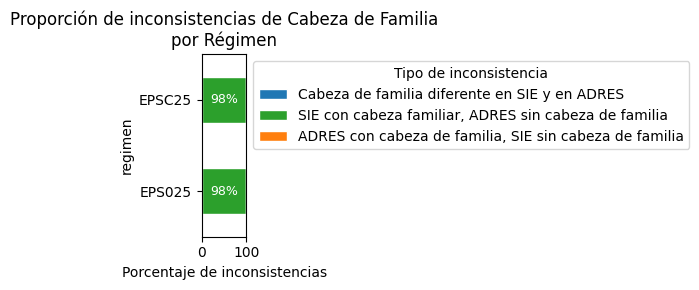

In [82]:
import matplotlib.pyplot as plt

# Crear tabla pivote para contar las inconsistencias por régimen
counts = pd.pivot_table(
    Df_SIE,
    index="regimen",
    columns="Validar_CF",
    values="AFL_ID",  # cualquier columna sirve para contar
    aggfunc="count",
    fill_value=0
)

# Simplificar seleccionando solo las categorías de interés
categorias_interes = [
    "Cabeza de familia diferente en SIE y en ADRES",
    "SIE con cabeza familiar, ADRES sin cabeza de familia",
    "ADRES con cabeza de familia, SIE sin cabeza de familia"
]
counts = counts[categorias_interes]

# 1) Calculamos proporciones
pct = counts.div(counts.sum(axis=1), axis=0) * 100

# 2) Dibujamos barras apiladas al 100%
fig, ax = plt.subplots(figsize=(6, 3))
pct.plot(
    kind="barh",
    stacked=True,
    ax=ax,
    color=["C0","C2","C1"],
    edgecolor="white",
)
# 3) Etiquetas de porcentaje en cada segmento
for i, regimen in enumerate(pct.index):
    left = 0
    for cat in pct.columns:
        w = pct.loc[regimen, cat]
        if w > 5:  # sólo anotar donde haya suficiente espacio
            ax.text(
                left + w/2, i,
                f"{w:.0f}%",
                va="center", ha="center",
                color="white", fontsize=9
            )
        left += w

# 4) Ajustes
ax.set_xlim(0,100)
ax.set_xlabel("Porcentaje de inconsistencias")
ax.set_title("Proporción de inconsistencias de Cabeza de Familia\npor Régimen")
ax.legend(title="Tipo de inconsistencia", bbox_to_anchor=(1,1), loc="upper left")
plt.tight_layout()
plt.show()

# 3. Guardar archivos

In [83]:
# Crear la subcarpeta "N14" dentro de R_Salida
output_folder = os.path.join(R_Salida, "N14")
Path(output_folder).mkdir(parents=True, exist_ok=True)
# Columnas a **no** incluir en el TXT
skip = ["Motivo"]
# Agrupar por la columna "DPR_ID" y guardar un TXT por cada grupo
for dpr, grupo in df_N14.groupby("DPR_ID"):
    filename = f"N14_{dpr}.TXT"
    output_file = os.path.join(output_folder, filename)
    grupo.drop(columns=skip).to_csv(
        output_file,
        sep=",",
        index=False,
        encoding="ANSI",
        header=None
    )

# Crear la subcarpeta "I02" dentro de R_Salida
output_folder = os.path.join(R_Salida, "I02")
Path(output_folder).mkdir(parents=True, exist_ok=True)
# Columnas a **no** incluir en el TXT
skip = ["municipio_x", "descripcion", "municipio_y"]
for dpr, grupo in df_I02.groupby("DPR_ID"):
    filename    = f"I02_{dpr}.TXT"
    output_file = os.path.join(output_folder, filename)

    # Opción A: drop por parámetro
    grupo.drop(columns=skip).to_csv(
        output_file,
        sep=",",
        index=False,
        encoding="ANSI",
        header=None
    )

In [84]:
file_path = os.path.join(R_Salida, "Reporte SIE.xlsx")
with pd.ExcelWriter(file_path, engine="openpyxl") as writer:
    Df_SIE.to_excel(writer, sheet_name="MS_SIE", index=False)
    DF_ADRES.to_excel(writer, sheet_name="DF_ADRES", index=False)
    df_N14.to_excel(writer, sheet_name="N14", index=False)
    df_I02.to_excel(writer, sheet_name="I02", index=False)
    Df_sin_AFL_ID.to_excel(writer, sheet_name="Df_sin_AFL_ID", index=False)
print(f"Archivo guardado: {file_path}")

Archivo guardado: \\Servernas\AYC2\ASEGURAMIENTO\ASEGURAMIENTO\PROCESO_ASEGURAMIENTO\REGIMEN SUBSIDIADO\MUNICIPIOS 2025\ACTUALIZACION SIE\01_Procesos BDUA validación SIE\06_Junio\Yesid\Reporte SIE.xlsx
